# Customers Segmentation

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as skc
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:\python\portfolio\Data sources\Mall_Customers.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Univariat Analasis

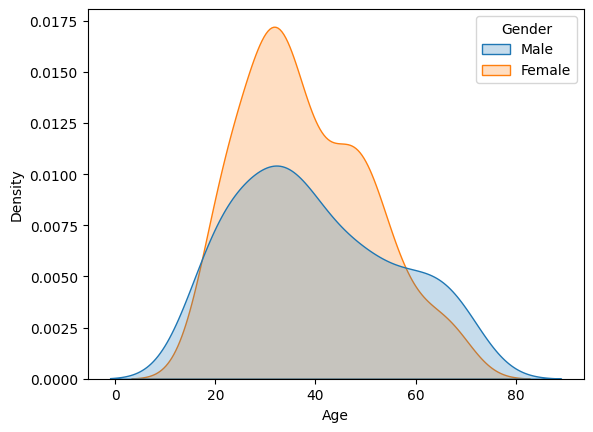

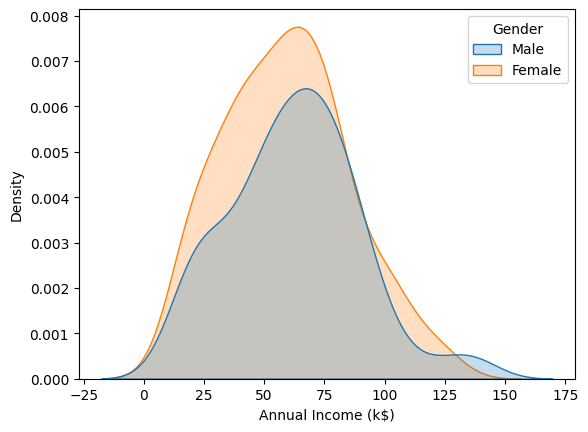

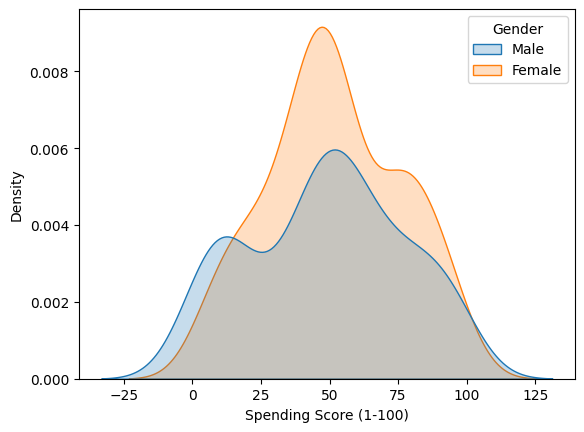

In [8]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.kdeplot(df, x = df[i], shade=True, hue=df['Gender'])


In [9]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

### Conclusions
#####  All parameters have a normal distribution
##### Highest density for both male and female customers - ages 20-40, annual income - 50-75K$, spending score - 40-60
##### Magority (56%) of customers are female

#### Bivariate Analasis

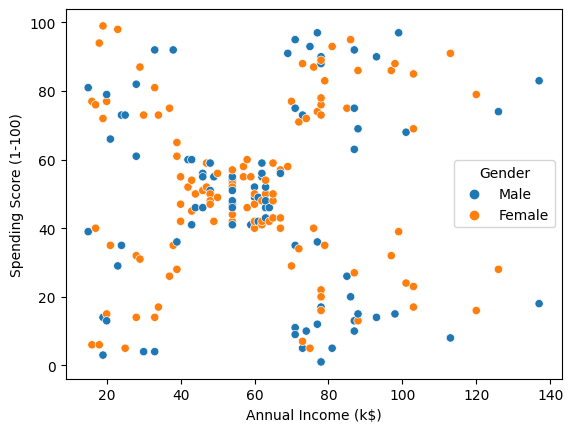

In [11]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue = 'Gender')
plt.show()

In [15]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
df1 = df.drop('CustomerID', axis=1)

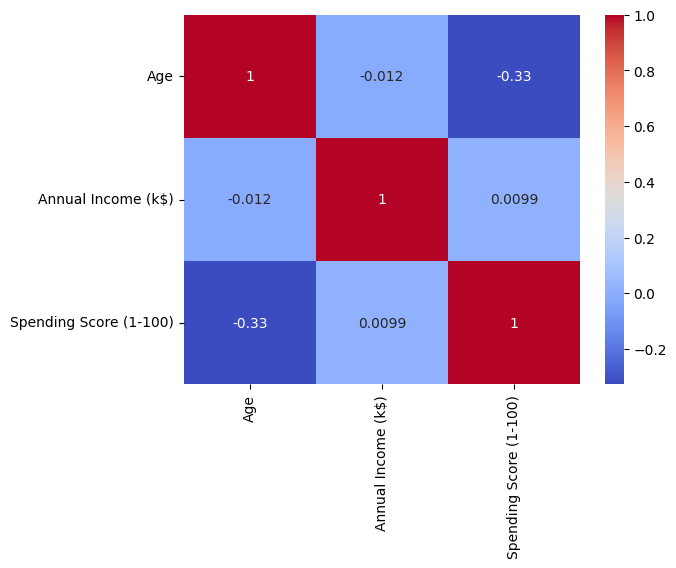

In [18]:
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')
plt.show()

### Conclusions
#####  A customer's annual income does not necessarily have a high impact on their spending score

#### Clustering - Univariate, Bivariate

##### Univariate

In [88]:
## starting the Kmeans algorythm with the default number of clusters, then using "elboe method" to define optimal number of clusters for analysis
clus1 = skc.KMeans(n_clusters=3)

In [89]:
clus1.fit(df1[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [90]:
clus1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [91]:
df1['Income Cluster'] = clus1.labels_
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,0
1,Male,21,15,81,0,4
2,Female,20,16,6,0,0
3,Female,23,16,77,0,4
4,Female,31,17,40,0,0


In [92]:
df1['Income Cluster'].value_counts()

2    92
0    72
1    36
Name: Income Cluster, dtype: int64

In [93]:
inert_score = []

for i in range(1,11):
    km=skc.KMeans(n_clusters=i)
    km.fit(df[['Annual Income (k$)']])
    inert_score.append(km.inertia_)

In [94]:
inert_score

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3931.9880952380954,
 2822.4996947496948,
 2182.59696969697,
 1761.8055555555552]

In [95]:
##Using "elbow method" to define how many clusters I should use for analysis

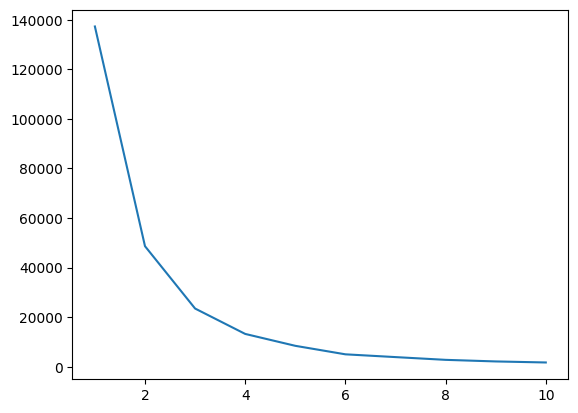

In [96]:
plt.plot(range(1,11), inert_score)

In [97]:
## The optimal amount of clusters seems to be 3 - going back to change cluster amount in the innitial definition of clus1

In [99]:
df1.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,37.833333,99.888889,50.638889
2,39.184783,66.717391,50.054348


##### Bivariate

In [100]:
## starting the Kmeans algorythm with the default number of clusters, then using "elboe method" to define optimal number of clusters for analysis

clus2 = skc.KMeans(n_clusters=5)
clus2.fit(df1[['Annual Income (k$)', 'Spending Score (1-100)']])
clus2.labels_
df1['Spending and Income Cluster'] = clus2.labels_
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,2
2,Female,20,16,6,0,4
3,Female,23,16,77,0,2
4,Female,31,17,40,0,4


In [101]:
inert_score2 = []

for i in range(1,11):
    km=skc.KMeans(n_clusters=i)
    km.fit(df1[['Annual Income (k$)', 'Spending Score (1-100)']])
    inert_score2.append(km.inertia_)

In [102]:
##Using "elbow method" to define how many clusters I should use for analysis

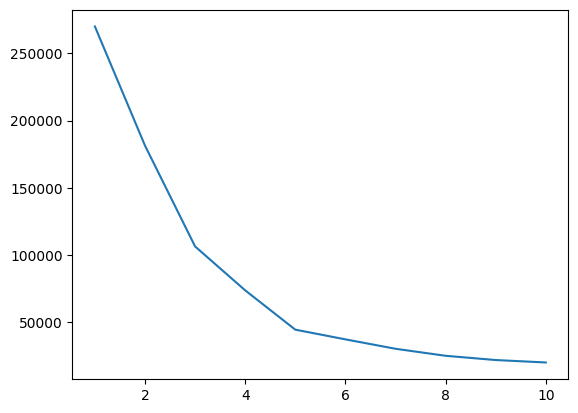

In [103]:
plt.plot(range(1,11), inert_score2)

In [104]:
## The optimal amount of clusters seems to be 5 - going back to change cluster amount in the innitial definition of clus2

In [105]:
centers = pd.DataFrame(clus2.cluster_centers_)
centers.columns=['x', 'y']

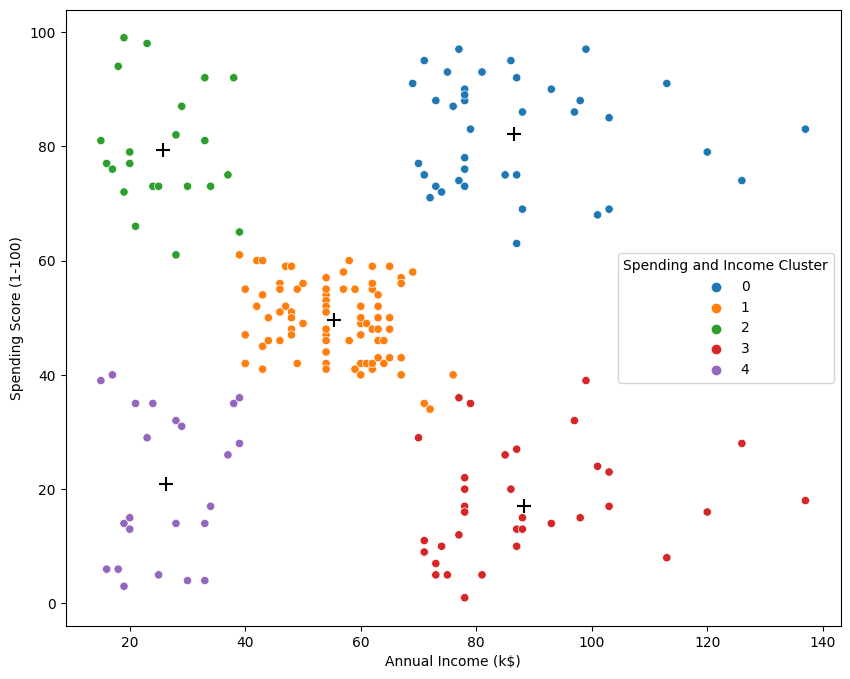

In [106]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='+')
sns.scatterplot(data=df1, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
plt.show()

In [107]:
pd.crosstab(df1['Spending and Income Cluster'], df1['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.590909,0.409091
3,0.457143,0.542857
4,0.608696,0.391304


In [108]:
df1.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


### Conclusions
#####  The cluster with the highest corrolation between annual income and spending score is cluster #4
#####  Cluster #4 is a good target group
#####  Cluster #4 is 53% female and has an avarage age of 32